# Rで学ぶ統計学入門

# 2.　母集団と標本

統計学の最初の第一歩は、データを集めるところから始まる

母集団から正しく標本を抽出するのは、意外と間違いやすいので、しっかり理解してほしい

## 2・1　母集団と標本の関係

**母集団**（popuklation）は、調査対象となる数値や属性などを共有する集合全体をさす

**標本**（sample）は母集団と共通の属性をもち、母集団の真部分集合として母集団の推定のために設けられたデータの小さな集合である
***
統計学の目的の一つは、標本から母集団の性質を明らかにすることである

特に、知りたい性質として、母集団の代表的な値を示す平均値$\mu$（**母平均**）や、母集団のデータのばらつき度合いを示す分散$\sigma^2$（**母分散**）がある

多くの場合、これらの値は未知である

そこで、標本を母集団の一部として抽出し、その標本の個々のデータをもとに母集団の性質を推定するのである

**データ**とは実験や調査などで取得した個々の値である

“標本の大きさ”とは一つの標本に含まれる“データの数”をさし、**標本サイズ**あるいは**サンプルサイズ**とよばれる

一方、**標本数**（サンプル数）は母集団から抽出する“標本の数”である

第1章で紹介した全国小学6年生の身長データを例に、母集団と標本の関係を説明する

調査の対象となる命題として、次のようなものを考える

　**“日本の小学6年生（11歳）は、女子の方が男子よりも平均して身長が高い”**

このとき、母集団は“日本の小学6年生”であり、属性として“性別（男女）”を考慮することになる

文部科学省は全国津々浦々余すところなく個々の生徒を調べ上げている。この調査は**全数調査**であり、男子・女子でそれぞれ55万人ほどにもなる大集団のデータである

しかし、全数調査のデータはきわめてまれである。実際の事例では、想定された母集団性質は未知の場合がほとんどである

では、個人として研究する私たちはどのようにこの命題を調査したらよいだろうか？  
――適切な標本を設定して、その被験者のデータをもって、母集団の命題の真偽を判定するのである

ただ、標本抽出を厳密に実施するとなるとけっこう難しい。“日本全国小学6年生（11歳）”“性別（男女）”の属性以外は、期待値にあらかじめ偏りが生じるような集め方をしてはいけない。つまり決められた条件以外は**無作為抽出**をする必要がある

一方、母集団が理論上は想定されていても、それが抽象的で把握しづらいことも想定される。たとえば、下記の生態学的な命題を調査することを考えてみよう

　**“広葉の落葉樹は針葉樹に比べて葉の蒸散速度が高い”**

この場合、母集団はどのように設定したらよいだろうか

+ 広葉の落葉樹や針葉樹として、どのような樹種を選定すればよいのか？
+ 季節はいつがよいか？春夏秋冬の任意でかまわないのか？
+ 調査地域を限定しておく必要はあるのか？東北地方がよいのか西日本がよいのか？
+ 樹齢はどの程度に設定するのか？大木か？若い樹か？

この命題は科学的に母集団を定義するには任意性が大きすぎる印象をもつかもしれない。しかし、詳細なただし書きをつけた母集団では、逆に、一般化しにくくなる。

**母集団の属性を絞りすぎると命題の一般性が失われる**という**トレードオフ**に注意する必要がある

## 2・2　標本の性質

簡単なデータセットを見てみる

In [1]:
A <- c(3, 4, 4, 5, 5, 5, 5, 6, 6, 7)
B <- c(1, 2, 4, 4, 5, 5, 5, 6, 8, 10)
(df1 <- data.frame(SampleA = A, SampleB = B))

SampleA,SampleB
3,1
4,2
4,4
5,4
5,5
5,5
5,5
6,6
6,8
7,10


In [2]:
options(repr.plot.width=5, repr.plot.height=3)

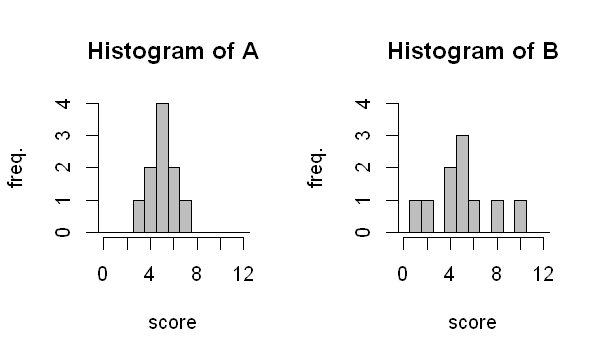

In [3]:
par(mfrow = c(1, 2)) 
hist(A, breaks=seq(-0.5, 12.5, 1), xlab="score", ylab="freq.", xlim=c(0, 12), ylim=c(0, 4), col="gray")
hist(B, breaks=seq(-0.5, 12.5, 1), xlab="score", ylab="freq.", xlim=c(0, 12), ylim=c(0, 4), col="gray")

これは仮想のデータの頻度分布（ヒストグラム；各階級に含まれるデータ数の頻度を示す）である。各データを把握するときに、少なくとも以下の2点が必要である

1）データの分布の位置はどのような値にあるだろうか？  
　標本Aも標本Bも5の辺りを中心に分布している

2）データの分布はどの程度ばらついているか？  
　標本Aはばらつきが少なく、標本Bはよりばらついている

もう一つの事例

二つの小学校の6年生男子の体重を示す

In [4]:
A <- c(43.3, 43.1, 42.6, 42.4, 42.2, 41.8, 41.7, 41.6, 41.5, 41.4, 
       40.8, 40.6, 40.5, 40.4, 40.4, 40.3, 40.2, 39.9, 39.9, 39.8,
       39.7, 39.6, 39.6, 39.5, 39.4, 39.3, 38.9, 38.9, 38.8, 38.8,
       38.7, 38.7, 38.6, 38.6, 38.5, 38.4, 38.3, 38.2, 38.1, 38.1,
       37.6, 37.4, 37.1, 37.8, 37.6, 37.5, 37.4, 37.3, 37.2, 37.1,
       37.1, 36.6, 36.5, 36.5, 36.4, 36.3, 36.2, 36.1, 35.4, 35.3,
       35.2, 35.1, 35.1, 34.7, 34.3, 34.2, 33.2, 33.1, 32.7, 31.5)
B <- c(47.3, 46.1, 45.6, 45.1, 44.5, 44.4, 43.7, 42.6, 42.5, 42.5, 
       41.4, 41.8, 41.6, 41.5, 40.7, 40.5, 40.4, 40.3, 40.1, 40.1,
       39.9, 39.8, 39.7, 39.6, 39.6, 39.5, 39.4, 38.9, 38.8, 38.8,
       38.7, 38.7, 38.6, 38.4, 38.2, 38.1, 38.1, 37.8, 37.7, 37.5,
       37.5, 37.4, 37.3, 37.3, 37.1, 36.8, 36.8, 36.7, 36.6, 36.4,
       36.2, 35.4, 35.4, 35.4, 35.3, 35.2, 34.9, 34.8, 34.7, 34.7,
       33.9, 33.8, 33.7, 33.3, 33.1, 32.8, 32.5, 32.1, 31.7, 29.5)

In [5]:
A

[1] 43.3 43.1 42.6 42.4 42.2 41.8 41.7 41.6 41.5 41.4 40.8 40.6 40.5 40.4 40.4
[16] 40.3 40.2 39.9 39.9 39.8 39.7 39.6 39.6 39.5 39.4 39.3 38.9 38.9 38.8 38.8
[31] 38.7 38.7 38.6 38.6 38.5 38.4 38.3 38.2 38.1 38.1 37.6 37.4 37.1 37.8 37.6
[46] 37.5 37.4 37.3 37.2 37.1 37.1 36.6 36.5 36.5 36.4 36.3 36.2 36.1 35.4 35.3
[61] 35.2 35.1 35.1 34.7 34.3 34.2 33.2 33.1 32.7 31.5

小学校Aの平均値と標準偏差

In [6]:
round(mean(A),2)
round(sd(A),2)

[1] 38.24

[1] 2.59

In [7]:
B

[1] 47.3 46.1 45.6 45.1 44.5 44.4 43.7 42.6 42.5 42.5 41.4 41.8 41.6 41.5 40.7
[16] 40.5 40.4 40.3 40.1 40.1 39.9 39.8 39.7 39.6 39.6 39.5 39.4 38.9 38.8 38.8
[31] 38.7 38.7 38.6 38.4 38.2 38.1 38.1 37.8 37.7 37.5 37.5 37.4 37.3 37.3 37.1
[46] 36.8 36.8 36.7 36.6 36.4 36.2 35.4 35.4 35.4 35.3 35.2 34.9 34.8 34.7 34.7
[61] 33.9 33.8 33.7 33.3 33.1 32.8 32.5 32.1 31.7 29.5

小学校Bの平均値と標準偏差

In [8]:
round(mean(B),2)
round(sd(B),2)

[1] 38.24

[1] 3.68

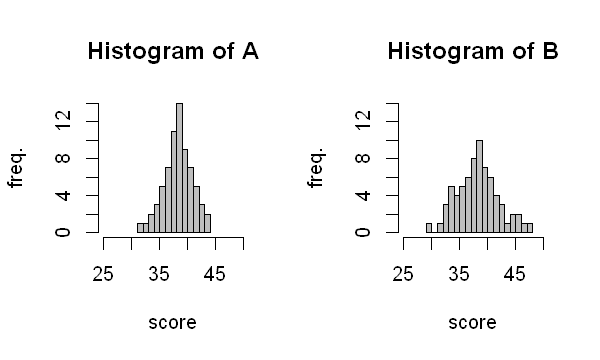

In [9]:
par(mfrow = c(1, 2)) 
hist(A, xlab="score", ylab="freq.", xlim=c(25, 50), ylim=c(0, 14), col="gray", breaks=15)
hist(B, xlab="score", ylab="freq.", xlim=c(25, 50), ylim=c(0, 14), col="gray", breaks=15)

この男子生徒の体重を把握するときにも、同じように次の2点の把握が必要である

3）データの分布の位置はどのような値にあるのだろうか？  
　38 kgの辺りを中心に分布している

4）生徒たちの体重はどの程度ばらついているのか？  
　小学校Aよりも小学校Bのほうがばらついている

### 2・2・1　中心や位置を表す指標

**a. 平均**（mean, average）

　平均値はデータの合計をデータの個数でわったもの
 
$$\bar{X}=\frac{1}{n}\sum_{i=1}^n X_i$$

> $\bar{X}:平均値$  
> $X:個々のデータ値$  
> $n:データの総数$

**b. 中央値**（median）

　中央値とは、データを大きい方から小さい方へと順番に並べたときに、ちょうど中央にくる値である

**c. 最頻値**（mode）

最頻値とは、分布の中で最も出現する度合いの高いデータの値のことである

母集団の平均値と標本の平均値を区別するときには、母集団平均は一般に$\mu$で表し、これを推定するための標本平均を$\bar{X}$で表す

中央値も箱ひげ図を利用してデータセットの全体像を示すときによく使われる

#### コラム2・1　箱ひげ図

In [10]:
options(repr.plot.width=3, repr.plot.height=4)

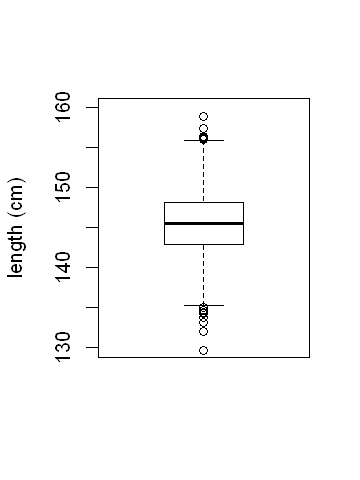

In [11]:
d <- rnorm(2000, mean=145.5, sd=4.0)
boxplot(d, ylim=c(130, 160), ylab="length (cm)")

データをプロットする方法の一つに・・・

### 2・2・2　ばらつき（変動）を表す指標

**a. 平方和**（sum of squares）

各データの平均値からの隔たりを**偏差**（deviation）とよぶ

$$偏差=X_i-\bar{X}$$

この偏差をすべて足したらばらつきの尺度となるだろうか？残念ながら、それらを総和するとちょうどゼロになってしまう

$$\sum_{i=1}^n (X_i-\bar{X})=0$$

いっそ偏差をすべて二乗にすればプラスになるから都合がよい。これにもとづいて生まれた尺度が**平方和**（偏差の平方和）であり、ふつう$SS$と略される

$$SS=\sum_{i=1}^n (X_i-\bar{X})^2$$

#### コラム2・2　平方和の計算方法

（ふだん平方和を手計算するようなことはまれなので割愛）

**b. 標本分散**（sample variance）

ばらつきの尺度として平方和を用いることには、実は不適当な面がある。それは、平方和がデータの個数に依存するからである

そこでデータの個数に依存しないように基準化するために、$SS$をデータ個数で割ってやると、新たな統計量が生まれる。これが**標本分散**（variance）である

標本分散は、$SS$を$n$で割る方法

$$\frac{SS}{n}=\frac{1}{n}\sum_{i=1}^n (X_i-\bar{X})^2$$

よりも、

$$\frac{SS}{n-1}=\frac{1}{n-1}\sum_{i=1}^n (X_i-\bar{X})^2$$

の方がよい（不偏分散？）

**c. 標準偏差**（standard deviation）

**標準偏差**は（$s$）は標本分散の平方根をとったものである。**母集団標準偏差**は$\sigma$で表す

$$標準偏差=\sqrt{s^2}$$

小学校Aの6年生男子の体重の標準偏差は$2.59$、小学校Bの標準偏差は$3.68$と差が表れている
***
ばらつきを示す三つの尺度、平方和$SS$、不偏分散$s^2$、標準偏差$s$は式の成り立ちをみると互いに密接に関連している

**d. 範囲**（range）

ばらつきの尺度として用いられる最も簡単なものは“範囲”で、レンジとよぶことが多い。レンジは、標本のデータ分布の最大と最小のデータ値の差である。ばらつきの尺度として適切でない

### 2・2・3　不偏分散

分散を計算するのは母集団の分布の推定を行うためでもある

標本の分散から推定される母集団分布は、実際よりも小さくなる傾向がある

この理由で、母集団分散の推定には、標本分散の式を変形した**不偏分散**（$s^2$）として扱うのが一般的である。$SS$で割る分母は$n$ではなく、$n-1$である。こうすることによって、標本分散を母集団分散の推定値にする

#### コラム2・3　不偏分散はなぜ平方和を$n-1$で割るか？

（興味深いお話なので興味がある方は読んでくださいー）

#### コラム2・4　自由度とは

（同上）

## 2・3　Rを使って計算してみよう

Rで簡単な計算を実行してみよう

Rの四則演算は、  
　$+ (和)$　　$-(減)$　　$*(乗)$　　$/(除)$  
で表す

右辺の値から左辺への代入は  
　$<-$  
 を使う

In [12]:
a <- 10
x <- (5+3)*2-a/5
x

[1] 14

次に、以下の10個のデータについて、Rを使って基礎統計量を計算してみる

$$1, 2, 3, 4, 5, 6, 7, 8, 9, 10$$

手始めに、算術平均を求める関数mean()と、不偏分散を求める関数var()を使って、平均値、不偏分散、標準偏差を求めてみよう

In [13]:
d <- c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
mean(d)

[1] 5.5

In [14]:
var(d)

[1] 9.166667

In [15]:
sd(d)

[1] 3.02765

基本的な関数の使い方など

①c()は入力した数値列を作成する  
②mean()は平均を求める  
③var()は不偏分散を求める  
④sd()は標準偏差を求める

さらに、Rの練習として、上記の同じ数列について別の関数を使って計算してみよう

In [16]:
d <- c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
a <- sum(d)/length(d)
a

[1] 5.5

In [17]:
b <- sum((d-a)^2)/(length(d)-1)
b

[1] 9.166667

In [18]:
sqrt(var(d))

[1] 3.02765

このRスクリプトを解説

①sum()はデータの総和を求める  
②length()はデータの個数を求める  
③sum((d-a)^2)は（偏差）$^2$の総和、すなわち$SS$（平方根）となる  
④Rはオブジェクト同士の演算として、dの10個のオブジェクトのデータ値に対して、a（平均値）を引くことを一挙に実行する

#### 演習問題2・1
mean()とvar()を使って、以下の数値列の平均値と不偏分散、標準偏差を求めよ

$$5.1, 7.4, 10.3, 9.2, 6.5, 6.1, 7.9, 8.7, 8.1, 9.4$$

In [19]:
d <- c(5.1, 7.4, 10.3, 9.2, 6.5, 6.1, 7.9, 8.7, 8.1, 9.4)
mean(d)
var(d)
sd(d)

[1] 7.87

[1] 2.629

[1] 1.621419

#### 演習問題2・2
問題2・1の数列に対してmean()とvar()を使わずに、平均と不偏分散、標準偏差を求めよ

In [20]:
a <- sum(d)/length(d)
a
sum((d-a)^2)/(length(d)-1)
sqrt(var(d))

[1] 7.87

[1] 2.629

[1] 1.621419